In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
# Declare a Base using `automap_base()`
Base = automap_base()


# reflect the tables
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
for row in session.query(Measurement, Measurement.date).limit(5).all():
    print(row)

    


(<sqlalchemy.ext.automap.measurement object at 0x000001B381D7E490>, '2010-01-01')
(<sqlalchemy.ext.automap.measurement object at 0x000001B381D7E190>, '2010-01-02')
(<sqlalchemy.ext.automap.measurement object at 0x000001B381D7E0A0>, '2010-01-03')
(<sqlalchemy.ext.automap.measurement object at 0x000001B381D7E040>, '2010-01-04')
(<sqlalchemy.ext.automap.measurement object at 0x000001B381D7E2B0>, '2010-01-06')


In [16]:
# Find the most recent date in the data set.
most_rec_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f"Most Recent Date: {most_rec_date[0]}")

Most Recent Date: 2017-08-23


In [20]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
recentdate = dt.datetime.strptime(most_rec_date[0], '%Y-%m-%d')
startdate = dt.date(recentdate.year -1, recentdate.month, recentdate.day)
startdate

# Perform a query to retrieve the data and precipitation scores

sel = [Measurement.date,Measurement.prcp]
queryresult = session.query(*sel).filter(Measurement.date >= startdate).all()



# Save the query results as a Pandas DataFrame and set the index to the date column
precip = pd.DataFrame(queryresult, columns=['Date','Precipitation'])
precip = precip.dropna(how='any')  
precip = precip.set_index("Date")

# Sort the dataframe by date
precip = precip.sort_values(["Date"], ascending=True)

 

# Set Date column as the index for charting

precip.head()



,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.02
2016-08-23,0.05
2016-08-23,0.70
2016-08-23,0.15


Text(0.5, 1.0, 'Daily Rain Totals')

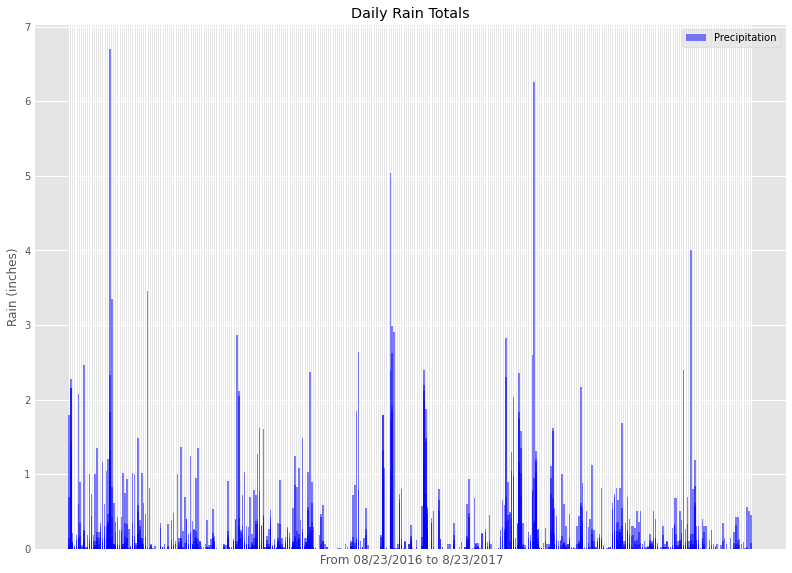

In [49]:
# Use Pandas Plotting with Matplotlib to plot the data

plt.style.use('ggplot')

date = precipitation.index.tolist()
rain = precipitation['Precipitation'].tolist()

# Manage the size of the plot
fig_size = plt.rcParams["figure.figsize"] # current plot size
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size # manage plot size

# Print bar chart
plt.bar(date,rain,color='blue', alpha=0.5, align="center",label='Precipitation')
plt.tick_params(
    axis='x',         
    which='both',    
    bottom=False,     
    top=False,        
    labelbottom=False) 
major_ticks = np.arange(0,100,50)
plt.xlabel(" From 08/23/2016 to 8/23/2017")
plt.ylabel("Rain (inches)")
plt.legend()
#plt.title(f"Rain from {len(new_cities_df)} Cities. \n" + "As of: " + str(today_date))
plt.title(f"Daily Rain Totals")

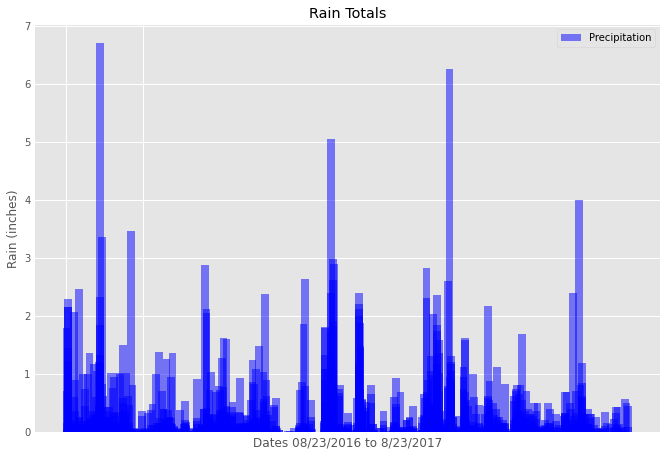

In [50]:
# Use Pandas Plotting with Matplotlib to plot the data

date = precipitation.index.tolist()
rain = precipitation['Precipitation'].tolist()

plt.figure(figsize=(10,7))
plt.bar(date,rain,width = 5 ,color='blue', alpha=0.5, align="center",label='Precipitation')
plt.tick_params(
    axis='x',        
    which='both',    
    bottom=False,      
    top=False,        
    labelbottom=False)
major_ticks = np.arange(0,100,50)
plt.xticks(major_ticks)

plt.title(f"Rain Totals")
plt.xlabel("Dates 08/23/2016 to 8/23/2017")
plt.ylabel("Rain (inches)")
plt.grid(which='major', axis='both', linestyle='-')
plt.legend()
plt.show()

In [36]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [51]:
# Design a query to calculate the total number stations in the dataset
session.query(Station.id).count()

9

In [52]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
 
sel = [Measurement.station,func.count(Measurement.id)]
stations = session.query(*sel).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.id).desc()).all()
stations    
    

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [54]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)]
most_active_stat = session.query(*sel).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.id).desc()).first()
most_active_stat

(54.0, 85.0, 71.66378066378067)

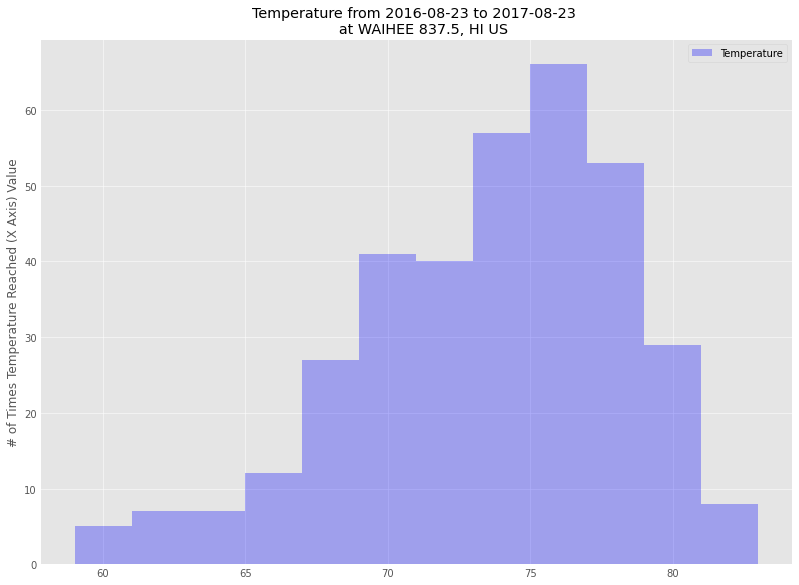

In [81]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station

tempresult = session.query(Measurement.tobs).\
    filter(Measurement.station == activestations[0][0]).\
    filter(Measurement.date >= startdate).all()
temperatures = list(np.ravel(tempresult))

sel = [Station.station,Station.name,Station.latitude,Station.longitude,Station.elevation]
queryresult = session.query(*sel).all()
stations_desc = pd.DataFrame(queryresult, columns=['Station','Name','Latitude','Longitude','Elevation'])

station_name = stations_desc.loc[stations_desc["Station"] == activestations[0][0],"Name"].tolist()[0]

# Plot the results as a histogram

plt.hist(temperatures, bins=12,rwidth=1.0, color = 'blue', alpha =.3, label='Temperature')
plt.grid(axis='both', alpha=0.50)
plt.ylabel('# of Times Temperature Reached (X Axis) Value')
plt.title(f"Temperature from {startdate} to {lateststr[0]} \n   at {station_name}")
plt.legend()


# Close session

In [80]:
# Close Session
session.close()